Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


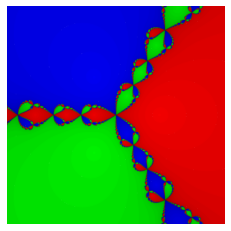

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


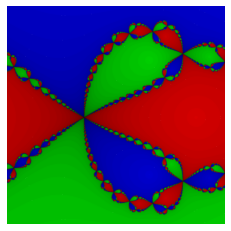

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


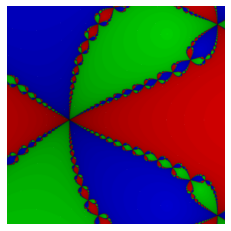

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


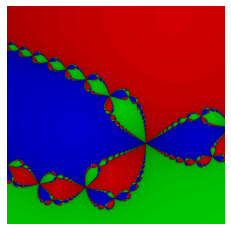

In [0]:
""" 
Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/
Z^3 - 1

"""
import math
import matplotlib.pyplot as plt
import numpy as np

def fcube(z):
    return z ** 3 - 1

def newton_set(width, height, zoom=1, x_off=0, y_off=0, niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    # drawing area
    xa, xb, ya, yb = -2.5, 2.5, -2.5, 2.5

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = complex(-0.5, math.sin(2*math.pi/3))
    r3 = complex(-0.5, -1*math.sin(2*math.pi/3))

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy = (y + y_off) * (yb - ya) / (zoom*(height - 1)) + ya

            for x in range(width):
                zx = (x + x_off) * (xb - xa) / (zoom*(width - 1)) + xa

                # Mapping real -> complex plane
                z = complex(zx, zy)
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = (fcube(z + complex(h, h)) - fcube(z)) / complex(h, h)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                    
                    znext = z - fcube(z) / dz # Newton iteration
                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[y,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[y,x] = (0, 255 - count*multcol, 0)
                elif abs(z-r3)<=eps:
                    # color blue
                    pixels[y,x] = (0, 0, 255 - count*multcol)
 
    return pixels

def display(width=1024, height=1024, niter=1024, zoom=1, x_off=0, y_off=0):
    """ Display a newton-raphson fractal """

    pimg = newton_set(width, height, zoom=zoom, x_off=x_off, y_off=y_off, niter=niter)
    plt.axis('off') 
    plt.imshow(pimg)
    plt.show()

display(zoom=1, x_off=0, y_off=0)
display(zoom=2, x_off=-2500, y_off=500)
display(zoom=3, x_off=-3500, y_off=1000)
display(zoom=4, x_off=-4000, y_off=2000)
